In [5]:
import pandas as pd
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt 

import sys, os
parent_dir = os.getcwd()
path = os.path.dirname(parent_dir)
sys.path.append(path)
directory = "/Users/brody/school/data/"

In [56]:
def process_data(algo):
    #input_path = f"experiments/logs/Homer_SimpleEnv/{algo}/{ts}/"
    #device_pth = "/home/ds1/w210/home-energy-optimizer/"+"data/debug/device_list.csv"
    #devices = pd.read_csv(device_pth)["device_id"].tolist()
    cols = [
        'device_id',
        'no_solar_cumulative_reward', 
        'no_battery_cumulative_reward',
        'sq_cumulative_reward',
        'cumulative_reward',
    ]
    df_list = []
    
    algo_dir = directory+algo
    
    for filename in os.listdir(algo_dir):
        if filename != 'aggregated_result_summary.csv':
            df = pd.read_csv(algo_dir+'/'+filename)
            df_list.append(df[cols].tail(1).copy())
    combined_df = pd.concat(df_list)    

    cols2=['no_solar_cumulative_reward','no_battery_cumulative_reward','sq_cumulative_reward','cumulative_reward']
    labels = ['No Solar','Solar Only','Expert Manual Model',f'HOMER RL - {algo.upper()}']
    agg_df = (combined_df[cols2].agg(['mean', 'std']))

    return combined_df, agg_df, labels, cols2

Text(0, 0.5, 'Cumulative Energy Bill [$]')

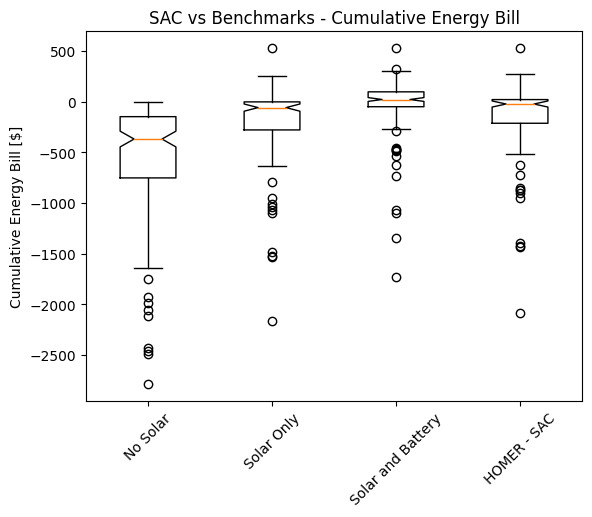

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title(f'{algo.upper()} vs Benchmarks - Cumulative Energy Bill')
ax1.boxplot(df[cols2], notch = True)
ax1.set_xticklabels(labels=labels, rotation = 45)
ax1.set_ylabel('Cumulative Energy Bill [$]')

Text(0.5, 1.0, 'Net Gain by device')

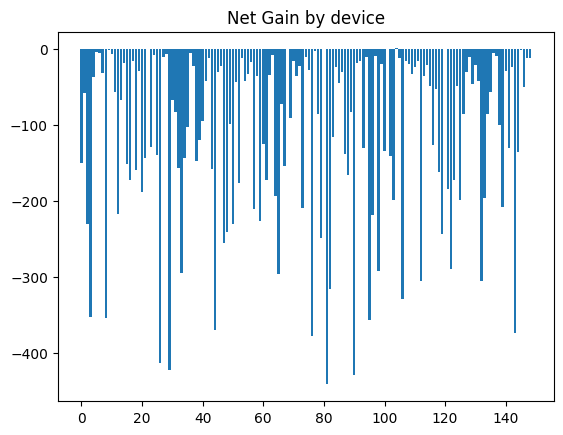

In [7]:
plt.bar(
    x=range(len(devices)), 
    height = combined_df['cumulative_reward'] - combined_df['sq_cumulative_reward']
)
plt.title('Net Gain by device')

In [23]:
df

,Datetime,Timestamp,time_x,time_y,weekday,month_x,month_y,region_1,region_2,region_3,...,tick,cumulative_reward,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,sq_soc,sq_net,sq_updated_action,sq_bat_output,device_id
0,1.642222e+18,1.642222e+09,-0.518773,-0.854912,1.0,0.866025,0.500000,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,1.0,-0.31331,0.0,0.0,EDB55CC1AF417
1,1.642223e+18,1.642223e+09,-0.500000,-0.866025,1.0,0.866025,0.500000,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,1.0,-0.31040,0.0,0.0,EDB55CC1AF417
2,1.642223e+18,1.642223e+09,-0.480989,-0.876727,1.0,0.866025,0.500000,0.0,0.0,0.0,...,2,0.0,0.0,0.0,0.0,1.0,-0.30768,0.0,0.0,EDB55CC1AF417
3,1.642223e+18,1.642223e+09,-0.461749,-0.887011,1.0,0.866025,0.500000,0.0,0.0,0.0,...,3,0.0,0.0,0.0,0.0,1.0,-0.30615,0.0,0.0,EDB55CC1AF417
4,1.642224e+18,1.642224e+09,-0.442289,-0.896873,1.0,0.866025,0.500000,0.0,0.0,0.0,...,4,0.0,0.0,0.0,0.0,1.0,-0.29733,0.0,0.0,EDB55CC1AF417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,1.644813e+18,1.644813e+09,-0.608761,-0.793353,0.0,0.500000,0.866025,0.0,0.0,0.0,...,8635,0.0,0.0,0.0,0.0,1.0,-0.32441,0.0,0.0,EDB55CC1AF417
8636,1.644813e+18,1.644813e+09,-0.591310,-0.806445,0.0,0.500000,0.866025,0.0,0.0,0.0,...,8636,0.0,0.0,0.0,0.0,1.0,-0.34198,0.0,0.0,EDB55CC1AF417
8637,1.644814e+18,1.644814e+09,-0.573576,-0.819152,0.0,0.500000,0.866025,0.0,0.0,0.0,...,8637,0.0,0.0,0.0,0.0,1.0,-0.37108,0.0,0.0,EDB55CC1AF417
8638,1.644814e+18,1.644814e+09,-0.555570,-0.831470,0.0,0.500000,0.866025,0.0,0.0,0.0,...,8638,0.0,0.0,0.0,0.0,1.0,-0.36850,0.0,0.0,EDB55CC1AF417


In [76]:
ts = "221129-205149"
algo =  'sac'

df, agg_df, labels, cols2 = process_data(algo)
agg_df

,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
mean,-130.596455,-45.271840,-8.001429,-31.794389
std,94.886535,67.600713,55.855429,65.907389


In [70]:
ts = "221129-225134"
algo =  'ppo'

df, agg_df, labels, cols2 = process_data(algo)
agg_df

,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
mean,-130.596455,-45.271840,-8.001429,-32.980293
std,94.886535,67.600713,55.855429,61.273038


In [74]:
ts = "221129-225134"
algo =  'rainbow'

df, agg_df, labels, cols2 = process_data(algo)
agg_df

,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
mean,-130.596455,-45.271840,-8.001429,-30.423580
std,94.886535,67.600713,55.855429,68.472676


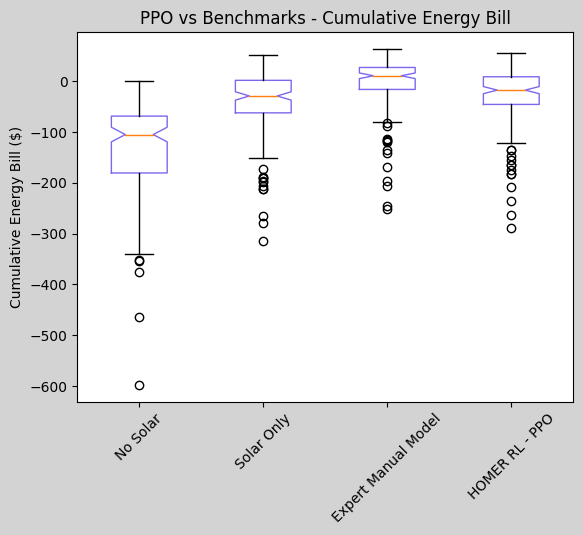

In [71]:
fig1, ax1 = plt.subplots()
ax1.set_title(f'{algo.upper()} vs Benchmarks - Cumulative Energy Bill')
ax1.boxplot(df[cols2], notch = True,boxprops=dict(color='mediumslateblue'))
ax1.set_xticklabels(labels=labels, rotation = 45)
ax1.set_ylabel('Cumulative Energy Bill ($)')
fig1.set_facecolor("lightgrey")


Text(0.5, 0, 'Device Number')

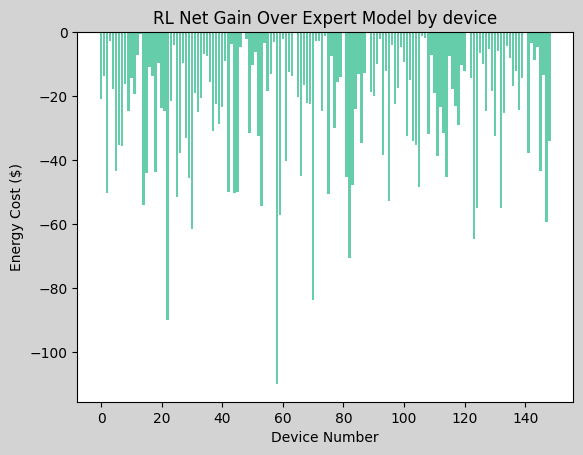

In [77]:
plt.figure(facecolor='lightgrey')
plt.bar(
    x=range(len(df)), 
    height = df['cumulative_reward'] - df['sq_cumulative_reward'],
    color='mediumaquamarine'
)
plt.title('RL Net Gain Over Expert Model by device')
plt.ylabel("Energy Cost ($)")
plt.xlabel("Device Number")

#ax = plt.axes()
#ax.set_facecolor("lightgrey")


In [47]:
df2

,device_id,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
2879,DD04108401266,-35.706360,-8.168203,6.747623,-1.734338
2879,DD04108624381,-84.415493,-34.812054,1.271164,-21.254092
2879,DD04108624683,-83.393107,-68.588357,-37.587205,-52.020035
2879,DD04108625556,-72.221873,-39.827033,-21.275096,-32.256942
2879,DD04108627065,-67.313819,-4.827619,13.599474,5.482274
...,...,...,...,...,...
2879,DDF4108747359,-67.519280,-49.543895,-43.148217,-44.543609
2879,ED055CC184C2A,-7.952490,-7.952378,-3.964126,-4.030233
2879,ED855CC1AF620,-183.051490,-82.261934,-40.079302,-69.954892
2879,EDA55CC1AF4FA,-27.196067,-1.973582,8.061282,7.223708


In [41]:
agg_df

,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
mean,-44.270566,-14.475512,-1.654051,-8.046759
std,36.523427,26.872692,21.814259,25.315932
